In [43]:
import os
import numpy as np
import glob
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

def get_section_results(file, clip=True):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Train_AverageReturn':
                Y.append(v.simple_value)
    if clip:
        X = (np.array(X)-1)[1:]
    else:
        X = np.array(X)
    return X, np.array(Y)

def get_log_dir(prefix, data_dir):
    dirs = sorted(os.listdir(data_dir), reverse=True)
    for e_dir in dirs:
        if prefix in e_dir:
            return e_dir
        
def get_log_data(prefix, data_dir, clip=True):
    data_sub_dir = get_log_dir(prefix, data_dir)
    for file in os.listdir(os.path.join(data_dir, data_sub_dir)):
        if file.startswith("events"):
            return get_section_results(os.path.join(os.path.join(data_dir, data_sub_dir), file), clip)

In [27]:
from matplotlib import pyplot as plt

In [30]:
os.listdir("hw3")

['.ipynb_checkpoints',
 'hw3_q1_dqn_MsPacman-v0_11-10-2020_18-36-07',
 'hw3_q2_doubledqn_1_LunarLander-v3_12-10-2020_22-58-23',
 'hw3_q2_doubledqn_2_LunarLander-v3_12-10-2020_23-27-29',
 'hw3_q2_doubledqn_3_LunarLander-v3_13-10-2020_00-49-39',
 'hw3_q2_dqn_1_LunarLander-v3_12-10-2020_20-39-42',
 'hw3_q2_dqn_1_LunarLander-v3_12-10-2020_20-40-59',
 'hw3_q2_dqn_1_LunarLander-v3_12-10-2020_20-42-30',
 'hw3_q2_dqn_2_LunarLander-v3_12-10-2020_21-11-19',
 'hw3_q2_dqn_2_LunarLander-v3_12-10-2020_21-12-23',
 'hw3_q2_dqn_3_LunarLander-v3_12-10-2020_21-45-09',
 'hw3_q3_hparam2_LunarLander-v3_13-10-2020_01-55-48',
 'hw3_q3_hparam3_LunarLander-v3_13-10-2020_01-56-04',
 'hw3_q3_hparam3_LunarLander-v3_13-10-2020_01-59-23',
 'hw3_q4_ac_100_1_CartPole-v0_11-10-2020_21-43-51',
 'hw3_q4_ac_10_10_CartPole-v0_11-10-2020_21-47-47',
 'hw3_q4_ac_1_100_CartPole-v0_11-10-2020_21-42-49',
 'hw3_q4_ac_1_1_CartPole-v0_11-10-2020_21-45-04',
 'hw3_q5_10_10_HalfCheetah-v2_11-10-2020_21-56-07',
 'hw3_q5_10_10_InvertedP

In [31]:
x, y = get_log_data("hw3_q1", "hw3")

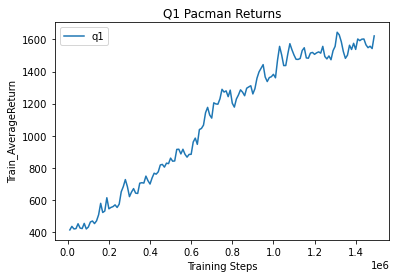

In [34]:
plt.plot(x, y, label="q1")
plt.xlabel("Training Steps")
plt.ylabel("Train_AverageReturn")
plt.title("Q1 Pacman Returns")
plt.legend()

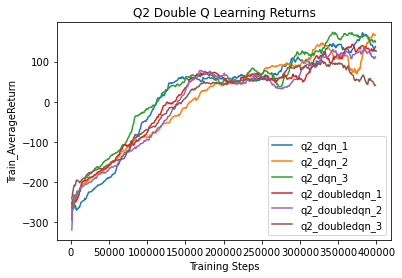

In [39]:
for i in range(1, 4):
    x, y = get_log_data(f"hw3_q2_dqn_{i}", "hw3")
    plt.plot(x, y, label=f"q2_dqn_{i}")
for i in range(1, 4):
    x, y = get_log_data(f"hw3_q2_doubledqn_{i}", "hw3")
    plt.plot(x, y, label=f"q2_doubledqn_{i}")
    
plt.xlabel("Training Steps")
plt.ylabel("Train_AverageReturn")
plt.title("Q2 Double Q Learning Returns")
plt.legend()

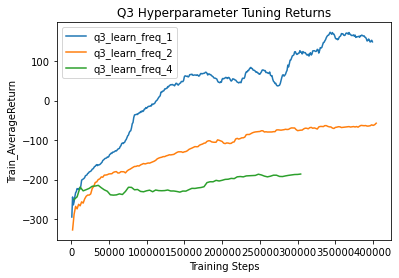

In [51]:
for i, learning_freq in enumerate([1, 2, 4]):
    x, y = get_log_data(f"hw3_q3_hparam{i+1}", "hw3")
    plt.plot(x*learning_freq, y, label=f"q3_learn_freq_{learning_freq}")
    
plt.xlabel("Training Steps")
plt.ylabel("Train_AverageReturn")
plt.title("Q3 Hyperparameter Tuning Returns")
plt.legend()

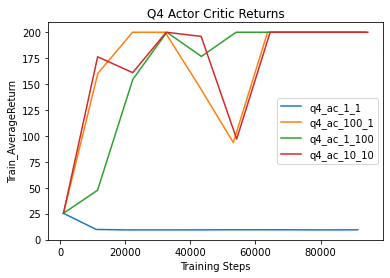

In [45]:
for case in ["1_1", "100_1", "1_100", "10_10"]:
    x, y = get_log_data(f"hw3_q4_ac_{case}", "hw3", clip=False)
    plt.plot(x, y, label=f"q4_ac_{case}")
plt.xlabel("Training Steps")
plt.ylabel("Train_AverageReturn")
plt.title("Q4 Actor Critic Returns")
plt.legend()

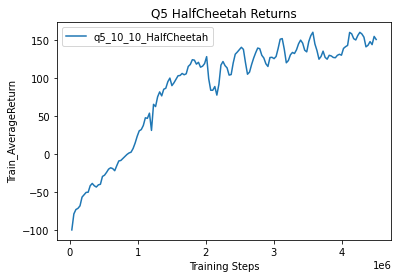

In [46]:
x, y = get_log_data(f"hw3_q5_10_10_HalfCheetah", "hw3", clip=False)
plt.plot(x, y, label=f"q5_10_10_HalfCheetah")

plt.xlabel("Training Steps")
plt.ylabel("Train_AverageReturn")
plt.title("Q5 HalfCheetah Returns")
plt.legend()

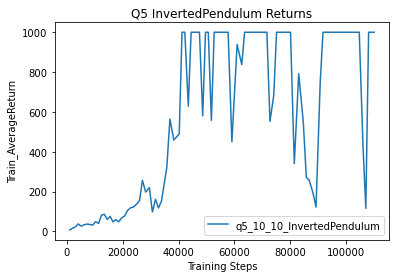

In [48]:
x, y = get_log_data(f"hw3_q5_10_10_InvertedPendulum", "hw3", clip=False)
plt.plot(x, y, label=f"q5_10_10_InvertedPendulum")

plt.xlabel("Training Steps")
plt.ylabel("Train_AverageReturn")
plt.title("Q5 InvertedPendulum Returns")
plt.legend()